## 1. Load airbnb & zillow merged project dataset - project_data.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_data = pd.read_csv("assets/project_data.csv", low_memory=False)

## 2. Question 2 Analysis: 
How do Airbnb property ratings and the number of reviews influence pricing trends in the housing market in 2023?

In [5]:
# Drop rows with NaN values in the "review rate number" column
merged_data.dropna(subset=["review rate number"], inplace=True)

# Convert rate number to int
merged_data["review rate number"] = merged_data["review rate number"].astype(int)

#### 2a. Step 1: Pull data for only 2023

In [6]:
# Define the range of years for the analysis
start_year = 2019
end_year = 2023


# Function to get the last day of the month
def last_day_of_month(year, month):
    if month in [1, 3, 5, 7, 8, 10, 12]:
        return 31  # Months with 31 days
    elif month in [4, 6, 9, 11]:
        return 30  # Months with 30 days
    else:
        # February: check for leap year
        return 29 if year % 4 == 0 else 28


# Generate a list of column names for each month of each year of interest
monthly_columns = {}
for year in range(start_year, end_year + 1):
    monthly_columns[year] = []
    for month in range(1, 13):
        day = last_day_of_month(year, month)
        column_name = f"{month}/{day}/{year}"
        if column_name in merged_data.columns:
            monthly_columns[year].append(column_name)

# Calculate the yearly average ZHVI for each neighborhood
yearly_avg_zhvi = {}
for year, columns in monthly_columns.items():
    if columns:  # Ensure there are columns for the year
        yearly_avg_zhvi[year] = merged_data.groupby("neighbourhood")[columns].mean().mean(axis=1)

# Convert the yearly averages to a DataFrame
yearly_avg_zhvi = pd.DataFrame(yearly_avg_zhvi)

### 2b. Step 2: Use the calculated price averages for each year

In [7]:
# Calculate Airbnb listing count for each neighborhood
airbnb_listing_count = (
    merged_data.groupby("neighbourhood").size().reset_index(name="airbnb_listing_count")
)

# Combine Airbnb listing count and yearly average ZHVI data
combined_data = pd.merge(airbnb_listing_count, yearly_avg_zhvi, on="neighbourhood")
combined_data

,neighbourhood,airbnb_listing_count,2019,2020,2021,2022,2023
0,Arden Heights,9,4.160248e+05,4.206415e+05,4.377858e+05,4.790372e+05,4.980696e+05
1,Arrochar,47,6.514846e+05,6.526108e+05,6.659444e+05,7.230428e+05,7.304496e+05
2,Astoria,1097,8.116429e+05,7.908011e+05,7.692332e+05,7.723108e+05,7.107342e+05
3,Bath Beach,41,8.154337e+05,7.718527e+05,7.584638e+05,7.792290e+05,7.546974e+05
4,Bay Ridge,206,9.802124e+05,9.019841e+05,9.033546e+05,8.855022e+05,7.470421e+05
...,...,...,...,...,...,...,...
148,Windsor Terrace,179,1.186847e+06,1.165920e+06,1.165856e+06,1.223001e+06,1.073213e+06
149,Woodhaven,145,6.185588e+05,6.423971e+05,6.620362e+05,6.977369e+05,6.928795e+05
150,Woodlawn,20,8.221766e+05,7.874717e+05,7.385032e+05,6.724403e+05,5.605188e+05
151,Woodrow,1,6.826850e+05,6.899717e+05,7.191588e+05,7.805972e+05,7.925477e+05


### 2c. Step 3: Merge above data with project_data to get number of reviews and review rate number

In [8]:
cleanup_with_borough = pd.merge(
    merged_data, combined_data, left_on="neighbourhood", right_on="neighbourhood"
)
cleanup_with_borough

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,9/30/2023,10/31/2023,11/30/2023,12/31/2023,airbnb_listing_count,2019,2020,2021,2022,2023
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,664570.6277,656191.0275,649729.4505,647670.1667,200,726388.386458,746097.857950,784026.703758,802674.475775,673750.874467
1,1144382,Large and Cozy Private Bedroom,87014850347,unconfirmed,Richardson,Brooklyn,Kensington,40.64106,-73.97426,United States,...,664570.6277,656191.0275,649729.4505,647670.1667,200,726388.386458,746097.857950,784026.703758,802674.475775,673750.874467
2,1221151,SUPER BIG AND COZY PRIVATE BEDROOM,50336791874,verified,Tucker,Brooklyn,Kensington,40.64302,-73.97255,United States,...,664570.6277,656191.0275,649729.4505,647670.1667,200,726388.386458,746097.857950,784026.703758,802674.475775,673750.874467
3,1409486,Private clean pleasant spacious room.,52738256367,verified,Morgan,Brooklyn,Kensington,40.64277,-73.97296,United States,...,664570.6277,656191.0275,649729.4505,647670.1667,200,726388.386458,746097.857950,784026.703758,802674.475775,673750.874467
4,1487360,Come and go as you please in BKLN!,56143744968,verified,Bailey,Brooklyn,Kensington,40.64354,-73.97777,United States,...,664570.6277,656191.0275,649729.4505,647670.1667,200,726388.386458,746097.857950,784026.703758,802674.475775,673750.874467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45855,29747446,Clean & Cozy 1 Bedroom Apartment in Brooklyn,71424999296,unconfirmed,Jennifer,Brooklyn,Gerritsen Beach,40.60645,-73.93215,United States,...,631577.9043,633121.6861,633339.0066,634494.6786,3,538862.223400,577048.240500,602617.020525,631187.990042,626738.441450
45856,31113284,Stylish 2 bedroom apartment with parking,74928406274,unconfirmed,Salma,Brooklyn,Gerritsen Beach,40.58994,-73.92364,United States,...,631577.9043,633121.6861,633339.0066,634494.6786,3,538862.223400,577048.240500,602617.020525,631187.990042,626738.441450
45857,35303032,Waterfront 3-decks condo.,29938565080,verified,Elena,Brooklyn,Gerritsen Beach,40.58956,-73.92929,United States,...,631577.9043,633121.6861,633339.0066,634494.6786,3,538862.223400,577048.240500,602617.020525,631187.990042,626738.441450
45858,29871714,Cozy pet-friendly one bedroom apartment.,4433486287,unconfirmed,Tatiana And Omar,Staten Island,Woodrow,40.53777,-74.20674,United States,...,795325.0155,795470.5189,794286.0794,792105.8755,1,682684.992475,689971.712717,719158.754358,780597.171500,792547.688783


### 2d. Visual - Overall Bubble Chart for 2023 for a sample of 200 records

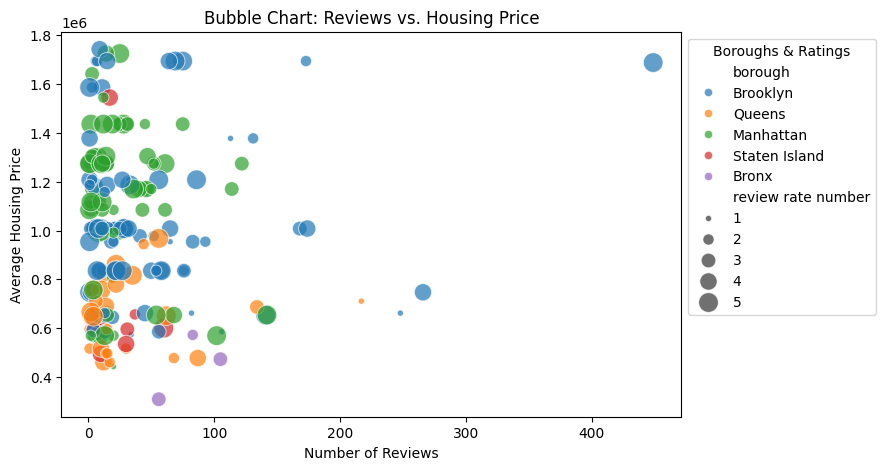

In [9]:
# Bubble chart
plt.figure(figsize=(8, 5))

## sample of 200 records
subset_df = cleanup_with_borough.sample(
    n=200, random_state=42
)  # Use a specific random_state for reproducibility

sns.scatterplot(
    x="number of reviews",
    y=2023,
    size="review rate number",
    hue="borough",
    data=subset_df,
    alpha=0.7,
    sizes=(20, 200),
    legend="brief",
)

# Set labels and title
plt.xlabel("Number of Reviews")
plt.ylabel("Average Housing Price")
plt.title("Bubble Chart: Reviews vs. Housing Price")

# Show legend
plt.legend(title="Boroughs & Ratings", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

### 2e. Interactive Visual to select specific borough

In [19]:
import plotly.express as px

# Drop rows with NaN values in the "review rate number" column
cleanup_with_borough.dropna(subset=["review rate number"], inplace=True)

# Create an interactive bubble chart using Plotly Express
fig = px.scatter(
    cleanup_with_borough,
    x="number of reviews",
    y=2023,
    size="review rate number",
    color="borough",
    hover_name="borough",  # Display borough name on hover
    size_max=50,
    opacity=0.7,
    labels={"number of reviews": "Number of Reviews", 2023: "Average Housing Price"},
)

# Update layout
fig.update_layout(
    title="Interactive Bubble Chart: Reviews vs. Housing Price",
    xaxis_title="Number of Reviews",
    yaxis_title="Average Housing Price",
)

# Show the plot
fig.show()

## 3. Question 3
How does the seasonal availability of Airbnb rentals vary across different boroughs, and does it correlate with housing price fluctuations over time?

### 3a. Step 1 : Find out seasonal availability of Airbnb properties

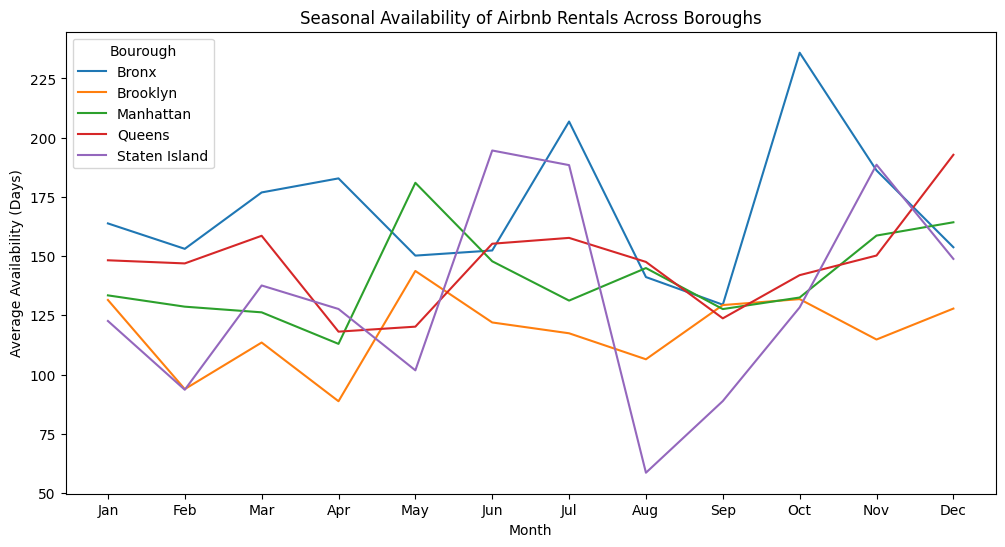

In [11]:
# Extract year and month from last_review column
cleanup_with_borough["last review"] = pd.to_datetime(cleanup_with_borough["last review"])
cleanup_with_borough["year"] = cleanup_with_borough["last review"].dt.year
cleanup_with_borough["month"] = cleanup_with_borough["last review"].dt.month

# Calculate seasonal availability of Airbnb rentals for each neighborhood
seasonal_availability = (
    cleanup_with_borough.groupby(["borough", "year", "month"])["availability 365"]
    .mean()
    .reset_index()
)

# Calculate seasonal averages across neighborhoods
seasonal_availability_avg = (
    seasonal_availability.groupby(["borough", "month"])["availability 365"].mean().reset_index()
)

# Plot seasonal availability trends across neighborhoods
plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="availability 365", hue="borough", data=seasonal_availability_avg)
plt.title("Seasonal Availability of Airbnb Rentals Across Boroughs")
plt.xlabel("Month")
plt.ylabel("Average Availability (Days)")
plt.xticks(
    range(1, 13),
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
)
plt.legend(title="Bourough", loc="upper left")
plt.show()

### 3b. Step 2: Analyze housing price fluctuations over time for each borough

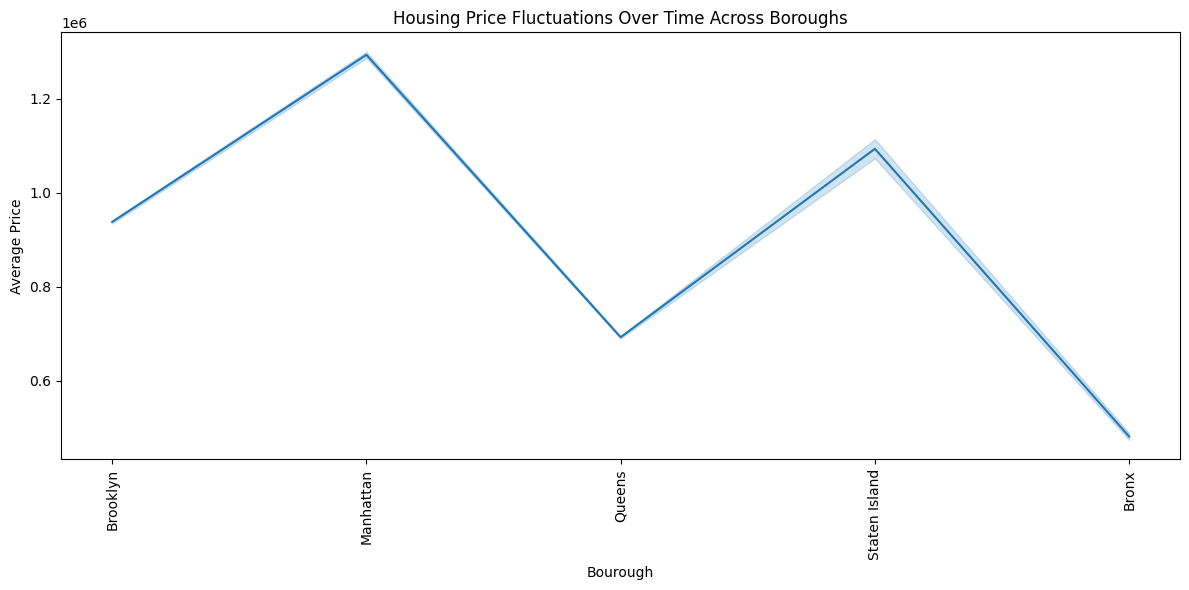

In [12]:
# Housing price columns are '2019', '2020', '2021', '2022', '2023'
cleanup_with_borough["average_price"] = cleanup_with_borough[[2019, 2020, 2021, 2022, 2023]].mean(
    axis=1
)

# Plot housing price fluctuations over time across boroughs
plt.figure(figsize=(12, 6))
sns.lineplot(x="borough", y="average_price", data=cleanup_with_borough)
plt.title("Housing Price Fluctuations Over Time Across Boroughs")
plt.xlabel("Bourough")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 3c. Step 3: Calculate correlation between seasonal availability and housing prices

In [13]:
# Merge availability and housing price data
availability_price_merged = pd.merge(
    seasonal_availability_avg, cleanup_with_borough, left_on="borough", right_on="borough"
)

# Calculate correlation
correlation = availability_price_merged[["availability 365_x", "average_price"]].corr()
print(f"Correlation between seasonal availability and housing prices: {correlation}")

Correlation between seasonal availability and housing prices:                     availability 365_x  average_price
availability 365_x            1.000000      -0.001634
average_price                -0.001634       1.000000


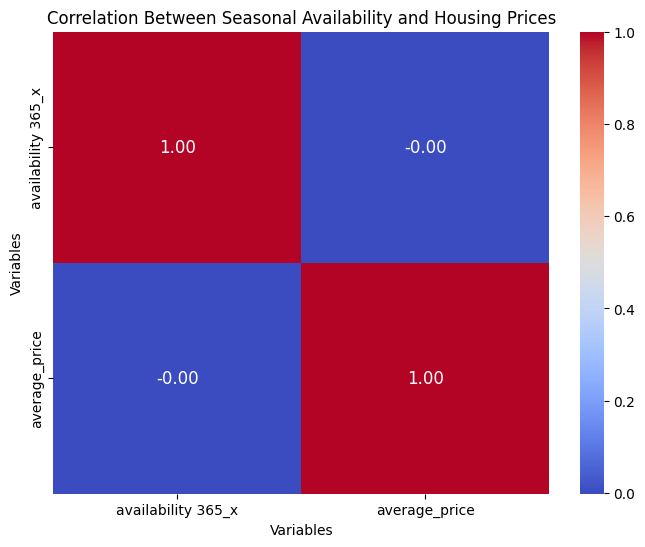

In [14]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 12})
plt.title("Correlation Between Seasonal Availability and Housing Prices")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()